<a href="https://colab.research.google.com/github/Flaviaestat/Phyton/blob/master/00_Principais_Phyton_Atualizado!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

### RESUMÃO PHYTON

#### Operadores, loops e funções básicas

Operadores Condicionais


In [ ]:
x = 300

if x == 300:
  status = 'Na mosca!'
elif x > 300:
  status = 'Maior!'
else:
  status = 'Menor :('

print('O valor é ' + status)



O valor é Na mosca!


Estrutura de loop básica


In [ ]:
for i in range(0,5):

  print(i)
  print( i * 2)


0
0
1
2
2
4
3
6
4
8


In [ ]:
numeros = []
multiplo = 2

ultimoDoRange = 20

for i in range(0, ultimoDoRange + 1):
  resto = i%multiplo
  numeros.append( i * resto)

print('Transforma em zero os multiplos de ' + str(multiplo) + ' :')
print(numeros)
print('O último elemento é')
print(numeros[-1])

print('O penúltimo elemento é')
print(numeros[-2])

print('O primeiro elemento é')
print(numeros[0])
print('O segundo é')
print(numeros[1])




Transforma em zero os multiplos de 2 :
[0, 1, 0, 3, 0, 5, 0, 7, 0, 9, 0, 11, 0, 13, 0, 15, 0, 17, 0, 19, 0]
O último elemento é
0
O penúltimo elemento é
19
O primeiro elemento é
0
O segundo é
1


Input box

In [ ]:
  age = input('Qual a sua idade?')


Qual a sua idade?40


In [ ]:
age

'40'

#### Função básica

In [ ]:
def idade(n):
  m = int(n)
  x = m * 2
  y = m / 2
  print('o dobro da sua idade é: ' + str(x))
  print('a metade da sua idade é: ' + str(y))



In [ ]:
# Chamada da função
idade(age)

o dobro da sua idade é: 80
a metade da sua idade é: 20.0


In [ ]:
def fizzBuzz(n):
    # Write your code here

    for i in range (1,n+1):

        if i%3 == 0 and i%5 == 0:
            print('FizzBuzz')
        elif i%3 == 0:
            print('Fizz')
        elif i%5 == 0:
            print('Buzz')
        else:
            print(i)

fizzBuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


Manipulação com arrays

In [ ]:
dates = ['2018-01-01','2017-02-01', '2019-10-01']
evento = ['A','B','C']
valores = [200,300,400]
categoria = ['XL', 'XL','XS']

months = dates[5:1] #não consegui extrair uma posição no string do array - mais fácil no pandas
print(months)


[]


In [ ]:
estados = ['GO', 'GO', 'SP', 'RJ']

estados_distintos = set(estados)

print(estados_distintos)

for index,element in enumerate(estados_distintos):
    lista = index,element

print(lista)


{'SP', 'GO', 'RJ'}
(2, 'RJ')


#### Loc e iLoc

In [ ]:
df[:5] # 5 primeiros índices
df[2:6] #de 2 a 5
df[5:] #índice 5 em diante
df[:-1] #ultimo
df.iloc[3,0] #linha 4 primeira coluna
df.iloc[:,2:] #todas as linhas, terceira coluna

#### Transforma arrays em dataframe **

In [ ]:
import numpy as np
import pandas as pd

#tranforma o arrays em colunas no mesmo dataframe

datesDf = pd.DataFrame({'Data': dates, 'Evento': evento, 'Valores': valores, 'Categoria': categoria})


#### Carregamento de bases por etapas / apendar dataframes

In [ ]:
safras = ['2017', '2018', '2019', '2020', '2021', '2022']

pers = pd.DataFrame()
for i in safras:
     query = "select * from customer_sandbox_zone.flavia_analise_timespan_agg " + '\n'
     query = query + "where substring(ds_safra, 1, 4) = '"
     query = query + i + "'"
     print(query)
     temp_pers = ac.df_athena_q('flavia-costa', query)
     pers = pers.append(temp_pers)

####  Manipulaçao de datas

Criando colunas de datas

In [ ]:
datesDf['Date'] = pd.to_datetime(datesDf['Data']) #padrão dateTime

datesDf['Date'] = pd.to_datetime(datesDf['Data'], format='%Y%m%d', errors='ignore') #padrão dateTime

df['yyyy_ww'] = df['date'].dt.strftime('%Y-%U')
datesDf['ano'] = datesDf['Date'].map(lambda x: x.strftime('%Y'))
datesDf['Dia'] = datesDf['Date'].map(lambda x: x.strftime('%D'))
datesDf['mes'] = datesDf['Date'].map(lambda x: x.strftime('%m'))
datesDf['Dia_Semana'] = datesDf['Date'].map(lambda x: x.strftime('%A'))

df['weekday'] = df['date'].apply(lambda x: parse(str(x)).strftime("%A")) #nome extenso
df_clean['hora'] = df_clean['dt_envio'].map(lambda x: x.strftime('%H'))


datesDf.head()

,Data,Evento,Valores,Categoria,Date,ano
0,2018-01-01,A,200,XL,2018-01-01,2018
1,2017-02-01,B,300,XL,2017-02-01,2017
2,2019-10-01,C,400,XS,2019-10-01,2019


In [ ]:
#lead data
comprasdia['dt_autorizacao_lead'] = (comprasdia.sort_values(by=['dt_autorizacao'], ascending=True).groupby(['cd_conta_cartao'])['dt_autorizacao'].shift(-1))

In [ ]:
#diferença entre datas
comprasdia['Difference'] = (comprasdia['dt_autorizacao_lead'] - comprasdia['dt_autorizacao']).dt.days

In [ ]:
#DATAS CALCULADAS PARA BUSCAR MÊS FECHADO
from datetime import datetime
from dateutil.relativedelta import relativedelta


today = datetime.today().strftime('%Y-%m-%d')
today_ma = (datetime.today() + relativedelta(months=-1))
today_ma_str = today_ma.strftime('%Y-%m-%d') #dia da extração mes anterior
since = today_ma_str[0:7] + "-01" #mes anterior - dia primeiro
until_aux = last_date_of_month = datetime(today_ma.year, today_ma.month, 1) + relativedelta(months=1, days=-1)
until = until_aux.strftime('%Y-%m-%d')

In [ ]:
#calcula o fim do mes atual
fim_mes = (datetime(datetime.today().year, datetime.today().month, 1) + relativedelta(months=1, days=-1)).strftime('%Y-%m-%d')
diasmes = fim_mes[8:10]

In [ ]:
print(today, since, until)

2020-09-08 2020-08-01 2020-08-31


In [ ]:
#carrega base em csv

path = ''

baseDfCsv = pd.read_csv(path)

In [ ]:
#parametros uteis para leitura em csv
cliques = pd.read_csv('export_retornos_infobip_fatura_turbinada.csv', usecols = ['to','send_at','opens','clicks'], parse_dates=['send_at'])

#### **Descrever features**

In [ ]:
datesDf.describe()

,Valores
count,3.0
mean,300.0
std,100.0
min,200.0
25%,250.0
50%,300.0
75%,350.0
max,400.0


#### Criando um contador (índice)

In [ ]:
datesDf['Indice'] = list(range(len(datesDf.index)))
datesDf['Indice'] = datesDf['Indice'] + 1

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice
0,2018-01-01,A,200,XL,2018-01-01,2018,1
1,2017-02-01,B,300,XL,2017-02-01,2017,2
2,2019-10-01,C,400,XS,2019-10-01,2019,3


Contar distintos em um dataframe

In [ ]:
print(len(datesDf['Categoria'].unique()))

2


In [ ]:
Contagem por categoria, valor

In [ ]:
datesDf['Categoria'].value_counts()

#### Contagem por var categorica

In [ ]:
baseCount = datesDf.groupby("Categoria")["Categoria"].count() #tb funciona para sum

baseCount.head(5)


Categoria
XL    2
XS    1
Name: Categoria, dtype: int64

In [ ]:
baseSum = datesDf.groupby("Categoria")["Valores"].sum()

baseSum.head(5)

Categoria
XL    500
XS    400
Name: Valores, dtype: int64

Agregação Outras funções

#### *Agregação* (médias, min, max) das variáveis numéricas por grupo

In [ ]:
baseAgg = datesDf.groupby('Evento').agg({'Valores':['min','max','mean', 'first','last'], 'Categoria':['first']})

baseAgg.head(5)

Valores                      Categoria
           min  max mean first last     first
Evento                                       
A          200  200  200   200  200        XL
B          300  300  300   300  300        XL
C          400  400  400   400  400        XS

#### Leads

In [ ]:
df['lagged_col1'] = df['col1'].shift(1)

#### Média móvel

In [ ]:
#Lag 30
reliance['SMA30'] = reliance['Close'].rolling(30).mean()

Soma de 30 registros a frente

In [ ]:
df_1['spending_dia_rol'] = df_1.spending_dia.shift(1).rolling(window = 30).sum()

#### Agregar com parametros variaveis

In [ ]:
vars_agregacao = ['proba_bin', 'limite_bin', 'sow_bin', 'renda_declarada_bin', 'fx_atraso_jun22', 'nr_behavior_score', 'score_gh']
agg = pb_add.groupby(vars_agregacao).agg({'conta_cartao':['count']})
agg.columns = agg.columns.droplevel(0)
agg = agg.reset_index()
agg.head()


#### Agregate simples (equivalente ao count(*))

In [ ]:
df.groupby(['col1', 'col2']).size()

In [ ]:
# top selling items by sales
sales_order = main_df.groupby('description').sum()['tot_order'].nlargest(10)

#### If para criação de coluna (Case )

In [ ]:
#função para usar com apply
def faixas_30(x):
    if x < 30:
        return 'a. menos 1 mes'
    elif x < 60:
        return 'b. 1 mes'
    elif x < 90:
        return 'c. 2 meses'
    elif x < 120:
        return 'd. 3 meses'
    elif x < 149:
        return 'e. 4 meses'
    elif x < 179:
        return 'f. 5 meses'
    elif x < 209:
        return 'g. 6 meses'
    elif x < 239:
        return 'h. 7 meses'
    elif x < 269:
        return 'i. 8 meses'
    elif x < 299:
        return 'j. 9 meses'
    elif x < 329:
        return 'k. 10 meses'
    elif x < 364:
        return 'l. 11 meses'
    elif x < 7200:
        return 'm. mais de 12 meses'
    else:
        return 'n. sem transacao'

In [ ]:
#Composto com mais variáveis
def regra_flex_new(row):
    ### Mulher, Solteira, Até 24 anos, cidade Pequena do Sudeste ou Norte, renda declarada inferior a R$ 1K ou Não declarada
    if row['ds_gender'] == 'FEMALE' \
    and row['ds_marital_status'] != 'MARRIED' \
    and row['ds_idade'] <= 24 \
    and row['ds_city_size'] == 'pequeno' \
    and (row['ds_region'] == 'Sul' or row['ds_region'] == 'Sudeste') \
    and (row['renda_declarada'] >= 0 and row['renda_declarada'] < 1000):
        return '8'
    ### Mulher, Solteira, Até 24 anos, cidade Média do Sudeste, renda declarada maior ou igual a R$ 1K
    elif row['ds_gender'] == 'FEMALE' \
    and row['ds_marital_status'] != 'MARRIED' \
    and row['ds_idade'] <= 24 \
    and row['ds_city_size'] == 'medio' \
    and (row['ds_region'] == 'Sul' or row['ds_region'] == 'Sudeste') \
    and row['renda_declarada'] >= 1000:
        return '1'

data_pop['codigo'] = data_pop.apply(eval(f'cl.{regra_flex_new}'), axis=1)
#só funcionou conforme abaixo
df['cl_1'] = df.apply(cluster1, axis=1)

#### Cria coluna com np.where

In [ ]:
#condição E
df_final['segmento1'] = np.where((df_final['transacoes_mes_atual'] == 0) & (df_final['transacoes_mes_anterior'] > 0),  'Deixou de comprar',
                        np.where((df_final['transacoes_mes_atual'] > 0) & (df_final['transacoes_mes_anterior'] == 0), 'Passou a comprar',
                        'Presente nos dois meses'))

In [ ]:
#condição OU
df['cl_csat'] = np.where((df['nr_mean_csat_day_last_365'] == 5) | (df['nr_mean_csat_day_last_365'] == 4), 'Alta Satisfacao',
                        np.where((df['nr_mean_csat_day_last_365'] == 3) | (df['nr_mean_csat_day_last_365'] == 2), 'Média Satisfacao',
                               np.where((df['nr_mean_csat_day_last_365'] == 1) | (df['nr_mean_csat_day_last_365'] == 0), 'Baixa Satisfacao', "-")))

In [ ]:
#comparacao com datas
df['out_prev_tpr'] = np.where(df['dt_chat'] == np.datetime64('2022-03-05'), 1, 0)

Outra forma de fazer condições

In [ ]:
df['ds_fx_rentabilidade'] = np.select(
        condlist=[
            df['vl_rentabilidade_min'] <= -27.7,
            df['vl_rentabilidade_min'] <= -20,
            df['vl_rentabilidade_min']  < 0,
            df['vl_rentabilidade_min'] >= 0
        ]
        ,choicelist=['Alto Custo','Medio Custo', 'Baixo Custo', 'Rentavél']
        ,default=-99
    )

#### Loop apendando um dataframe / Simulação

In [ ]:
def sim(n):

    result_simulacao = pd.DataFrame([], columns=['delta_p_fatura', 'delta_p_logistica', 'delta_csat','delta_tpr','delta_tmat','delta_recontato','delta_nr_chats'])

    for n in range(n):
        delta_p_fatura = random.uniform(-0.2, 0.2)
        delta_p_pagamento = random.uniform(-0.2, 0.2)
        delta_p_conta = random.uniform(-0.2, 0.2)
        delta_p_cartao = random.uniform(-0.2, 0.2)

        delta_p_logistica = delta_p_fatura * 0.0621 + delta_p_pagamento * 0.0021 +  delta_p_conta * -0.0161 + delta_p_cartao  * 0.6823

        delta_nr_chats = 0 #nr de chats fixo
        delta_resolucao_bot = random.uniform(-0.2, 0.2)

        delta_abandono = -0.05 * delta_resolucao_bot
        delta_tpr = delta_nr_chats * 0.6 + delta_p_pagamento * -0.8 + delta_p_fatura * -0.8 + delta_p_logistica * -0.85 + delta_p_conta * -0.4
        delta_csat = -0.01 * delta_tpr +  -0.01 * delta_abandono # vou retirar -0.05 * delta_recontato para permitir o recontato
        delta_recontato = delta_csat * -1
        delta_tmat = delta_tpr * -0.01 + -0.05 * delta_recontato + -0.01 * delta_abandono

        result_temp = pd.DataFrame({'delta_p_fatura': delta_p_fatura, 'delta_p_logistica': delta_p_logistica,
                                    'delta_csat': delta_csat, 'delta_tpr': delta_tpr,
                                    'delta_tmat': delta_tmat, 'delta_recontato': delta_recontato,
                                    'delta_nr_chats': delta_nr_chats}, index=[0])

        result_simulacao = result_simulacao.append(result_temp)

    return result_simulacao

#### Deduplicar

In [ ]:
.drop_duplicates()

#### Dropar coluna do df (drop)

In [ ]:
df.pop('class')

#### Rename /  Renomear

In [ ]:
df = df.rename(columns={'Long column name' : 'column'})

In [ ]:
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

#### Alterar tipo da variável

In [ ]:
ser.astype('category')
ser.astype('int')
ser.astype('str')

In [ ]:
#exception para alterar o tipo ignorando os literais
def num(s):
    try:
        return int(s)
    except ValueError:
        return 0

#### Ordenar - sort

In [ ]:
df.sort_values('coluna', ascending = False)

#### Exemplos de agregação retirando outros níveis da label

In [ ]:
vars_agregacao = ['proba_bin', 'limite_bin', 'sow_bin', 'renda_declarada_bin', 'fx_atraso_jun22', 'nr_behavior_score', 'score_gh']
agg = pb_add.groupby(vars_agregacao).agg({'conta_cartao':['count']})
agg.columns = agg.columns.droplevel(0)
agg = agg.reset_index()
agg.head()


In [ ]:
#agregação com colunas da base como variável
col_agg1 = dfr.drop(coluna_contagem, axis = 1).columns.to_list()
agg1 = dfr.groupby(col_agg1).agg({'cpfs':['sum']})

#### Pivot tables

In [ ]:
df2.pivot_table(values='X', rows='Y', columns='Z', aggfunc=lambda x: len(x.unique())

In [ ]:
dados_rfm_mes.pivot_table(index = 'segmento_rfm', columns= 'mes_ref', values = 'contas', aggfunc=np.sum)

#### Transpor e transformar colunas em linhas (melt)

In [ ]:
df_model = df_model.drop(['n_cluster'], axis = 1).set_index('var_value').transpose().reset_index()


In [ ]:
df.T

In [ ]:
df_melt = pd.melt(df_model, id_vars=['index'])

#### Funções string

In [ ]:
#posição do conteúdo de uma coluna em outra
City = df['cidade'].values.astype(str)
Estab = df['estab_clean'].values.astype(str)
df = df.assign(pos = find(Estab, City, start=0, end=None))

#replace de coluna
df = df.assign(estab_clean_2 = replace(Estab, City, ''))
df = df.assign(pos_espaco = find(Estab, ' ', start=0, end=None))
df['tam_caract_cidade'] = df['cidade'].str.len()

#retira tokens consecutivos
df['estab_clean_3'] = df['estab_clean_3'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')

#substring com posições definidas
dados_rfm_mes['ano'] = dados_rfm_mes['mes_ref'].str[:4]

#não contém - negação é ~
arqfinal_agg2 = arqfinal_agg[~arqfinal_agg['nm_estabelecimento'].str.contains(';')]

#quebrar um array
df_clean['pca_1'] = df_clean['pca'].astype('string').str.split(",").str[1]
df_clean['pca_2'] = df_clean['pca'].astype('string').str.split(",").str[0]
for i in ['pca_1','pca_2']:
    df_clean[i] = df_clean[i].str.replace(']','').str.replace('[','').astype("float")


In [ ]:
#
def trata_estabelecimentos(x):
    x = re.sub(r'(^(?=.*\bLOJAS)(?=.*AMERICANAS\b).*$)', 'LOJAS AMERICANAS', x)
    #POSSUI UBER E EATS
    x = re.sub(r'(?=.*\bUBER\b)(?=.*\bEATS\b).*$', 'UBER EATS', x)
    #POSSUI UBER E NÃO EATS
    x = re.sub(r'(?=.*\bUBER\b)(?!.*EATS\b).*$', 'UBER', x)
    x = re.sub(r'^(?=.*\bGOOGLE)(?=.*GARENA\b).*$', 'GOOGLE GARENA', x)
    x = re.sub(r'(?=.*\bGOOGLE TEMPORARY HOLD\b).*$', 'GOOGLE TEMPORARY HOLD', x)
    x = re.sub(r'(?=.*\bIFD BR).*$', 'IFOOD', x)
    x = re.sub(r'(?=.*\bIFOOD).*$', 'IFOOD', x)
    x = re.sub(r'(?=.*\bOBOTICARIO).*$', 'OBOTICARIO', x)
    x = re.sub(r'(?=.*\bHNA BOTICARIO).*$', 'OBOTICARIO', x)
    x = x.replace('DL GOOGLE','GOOGLE')
    x = x.replace('MERCPAG GOOGLEPLAY','GOOGLE PLAY')
    x = x.replace('GOOGLEPLAY','GOOGLE PLAY')
    x = x.replace('C E A', 'C A MODAS')

    #PARA ESSES CASOS EU NÃO QUERO BUSCAR TODA A STRING
    x = x.replace('MERCADOPAGO MERC ', 'MERCADOPAGO ')
    x = x.replace('MERCPAG MERCADOLIVRE', 'MERCADOLIVRE')
    x = x.replace('MERCPAGO', 'MERCADOPAGO')
    x = x.replace('MERCPAG', 'MERCADOPAGO')
    x = x.replace('EBANX','')

    x = x.strip()
    return x

#### Seleciona Colunas

In [ ]:
# select only required columns
baseReduzida = datesDf[["Valores", "Evento"]]

baseReduzida.head()

,Valores,Evento
0,200,A
1,300,B
2,400,C


In [ ]:
#colunas contendo ln
cols4 = df_4.filter(like='ln_').columns.to_list()

In [ ]:
#not like '_h_'
df_diagnostico_final_alertas.filter(regex='^((?!_h_).)*$')

Cria nova coluna

In [ ]:
datesDf['Valores10Perc'] = datesDf['Valores'] * 1.1 #metodo mais simples - aplicando crescimento de 10%
datesDf['Valores20Perc'] = datesDf['Valores'].apply(lambda x: x * 1.2) #com apply - aplicando crescimento de 20%

#função que multiplica por 2 para ser aplicado na coluna
def doubleData(x):
   return x * 2

datesDf['ValoresDobro'] = datesDf['Valores'].apply(doubleData) #com apply e função doubleData

#função para criar faixa de valores
def Status(x):
  if x >= 300:
    return 'faixa1'
  else:
    return 'faixa0'

datesDf['Status'] = datesDf['Valores'].apply(Status) #com apply e função de classificação

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1


#### Função de percentiles

In [ ]:
def q50(x):
            return x.quantile(0.5)
# 90th Percentile
def q90(x):
            return x.quantile(0.9)

#### Plot simples

In [ ]:
ax = invoice_period_agg['total_customers'].cumsum().plot()
ax2 = invoice_period_agg['tot_order'].cumsum().plot()
ax.set_yscale('log')

#### Tratamento NULLS / Missings

In [ ]:
datesDf['exemploNull'] = np.nan # criando coluna de nulls para exemplo

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,NaN
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,NaN
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,NaN


Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

isnull(): Generate a boolean mask indicating missing _cs
notnull(): Opposite of isnull()
dropna(): Return a filtered version of the data
 fillna(): Return a copy of the data with missing values filled or imputed

In [ ]:
datesDf['exemploNull'] = datesDf['exemploNull'].fillna(0.0) #recodificando para 0

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0


In [ ]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace = True)
  elif df[column].dtype != 'object':
    df[column].fillna(df[column].median(), inplace = True)

#### Filtrar

In [ ]:

 #primeira forma
datesFilter = datesDf[datesDf['Status'] == 'faixa1']



#### Filtrar por lista

In [ ]:
faixas = ['faixa1'] #permite mais de um valor

datesFilter = datesDf[datesDf.Status.isin(faixas)]

datesFilter.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0


In [ ]:
df.dropna(subset=['value_euro'], inplace=True)

#### Filtrar com não contém

In [ ]:
faixas = ['faixa1']#permite mais de um valor

datesFilter = datesDf[~datesDf.Status.isin(faixas)] # naõ contém

datesFilter.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0


#### Join

In [ ]:
# Trazendo a descrição dos eventos A, B e C para o dataFrame "datesDf"
# Mas antes, vou criar um dataframe de testes "DescriEventosDf" com a descrição dos eventos A e B (não incluirei C para testar)

ChaveEventos = ['A','B']
DescriEventos = ['Transacao concluida', 'Transacao negada']
DescriEventosDf = pd.DataFrame({'Evento': ChaveEventos, 'Desc_Evento': DescriEventos})


In [ ]:
datesDfAdd = datesDf.join(DescriEventosDf.set_index('Evento'), on = 'Evento', how = 'left' )

#pode usar lsuffix e rsuffix quando o nome das chaves é diferente. Ex: lsuffix='_caller', rsuffix='_other' (nesse caso não precisa inserir on e how)

datesDfAdd.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull,Desc_Evento
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0,Transacao concluida
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0,Transacao negada
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0,NaN


In [ ]:
datesDfAdd2 = datesDf.join(DescriEventosDf.set_index('Evento'), on = 'Evento', how = 'right' )

datesDfAdd2.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull,Desc_Evento
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0,Transacao concluida
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0,Transacao negada


Zfill para acerto de campos antes do join

In [ ]:
baseWill['cli_nr_cpf'] = baseWill['cli_nr_cpf'].astype('string').str.zfill(11)

####  Criando variáveis com nome variável em loop

In [ ]:
percentuais_assuntos = ['p_logistica','p_fatura','p_pagamento', 'p_geral_conta', 'p_geral_cartao',
    'p_fraude', 'p_geral_tecnologia' , 'p_geral_outros']

for i in percentuais_assuntos:
    globals()['m_%s' % i] = df[i].mean()

#### Histograma

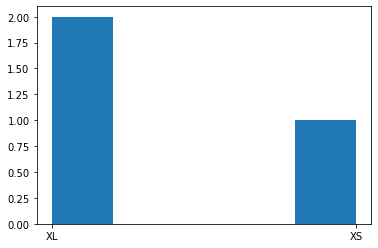

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(datesDf['Categoria'], bins = 5)

plt.show()

#### Código para gráfico a partir do value counts

In [ ]:
df_flx3['comb5'].value_counts(normalize=True)[:20].sort_values().plot(kind='barh', figsize=(10, 10))

In [ ]:
https://seaborn.pydata.org/generated/seaborn.histplot.html

In [ ]:
#gráfico seaborn
%matplotlib inline

plt.figure(figsize = (20,10))
sns.histplot(data=df, x='tempo_entre_chats', hue="resolução_bot", multiple="stack", stat="percent", discrete=True)
plt.show()

#### Scatterplot

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datesDf['Valores10Perc'],datesDf['Valores20Perc'])

#### Gráfico Plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px

plotly.offline.init_notebook_mode()
variavel = 'ds_safra'

df_agg_2 = df_agg.pivot_table(columns=variavel,index = 'personas_cluster', values='clientes', aggfunc=np.sum)
df_agg_2 = df_agg_2.query('personas_cluster != "Outros"')
for i in df_agg_2.columns:
    df_agg_2[i] = df_agg_2[i] / df_agg_2[i].sum()

df_agg_2 = df_agg_2.reset_index()
df_agg_2 = pd.melt(df_agg_2, id_vars=['personas_cluster'])
df_agg_2['value'] = df_agg_2['value'] * 100
fig = px.bar(df_agg_2, x=variavel, y="value",color = "personas_cluster" , barmode="group")
fig.show()
x = df_agg_2[variavel]
y = df_agg_2.personas_cluster
z = df_agg_2.value.round(1)

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=x,
        y=y,
        colorscale='oranges', texttemplate="%{z}", textfont={"size":8}))

fig.update_layout(
    title='Personas por ' + variavel
    , height = 700
    #, width = 800
    , xaxis_nticks=36)

fig.show()

#### Gráfico Seaborn com Loop - com agregação antes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_agregacao = ['ie_bin' , 'cred_bin', 'limite_bin', 'nr_behavior_score', 'score_gh'] #vão estar no x. Precisam ser categóricas

for i in vars_agregacao:
    group_var = 'proba_bin' #vai estar na legenda
    x_var = i
    campo_contagem = 'count'
    agg = pb_add.groupby([i, group_var]).agg({'conta_cartao':['count']}) #alterar nome do dataframe e variavel de contagem
    agg.columns = agg.columns.droplevel(0)
    agg = agg.reset_index()
    df_viz = agg.pivot_table(columns=x_var,index = group_var, values=campo_contagem, aggfunc=np.sum)

    for i in df_viz.columns:
        df_viz[i] = df_viz[i] / df_viz[i].sum()

    df_viz = df_viz.reset_index()
    df_viz = pd.melt(df_viz, id_vars=[group_var])
    df_viz['value'] = df_viz['value'] * 100
    x = df_viz[x_var].astype('str')
    y = df_viz[group_var].astype('str')
    z = df_viz.value.round(1)
    plt.figure(figsize = (20,10))
    sns.barplot(data = df_viz, x = x, y = z, hue = y, palette="ch:s=1,rot=-2")
    plt.show()

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(data = pb_add, y = 'pc_sow', x = 'proba_bin', hue='flag_baixo_ie_cred') #hue não fica tão legal com muitas categorias. Y é uma measure
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(data=projecao_final, x="data", y="erro_ponto")
plt.show()

In [ ]:
#line plot two axes
sns.lineplot(data=df.column1, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df.column2, color="b", ax=ax2)

In [ ]:
sns.catplot(
    data=summary_by_medal,
    x='Country',
    y='medal count',
    hue='Medal',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3) # height should be three times width

In [ ]:
#correlação
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(id_columns, axis=1).corr(), annot=True, cmap="coolwarm", vmax=0.5)
plt.show()

#### Formatação condicional nos pandas

In [ ]:
def background(cell_value):
    highlight_1 = 'background-color: #ee964b;'
    highlight_2 = 'background-color: #f4d35e;'
    highlight_3 = 'background-color: #f1dca7;'
    highlight_4 = 'background-color: #bee3db;'
    highlight_5 = 'background-color: #c6dabf;'


    default = ''

    if type(cell_value) in [float, int]:
        if cell_value > 1:
            return highlight_1
        elif cell_value > 0.5 and cell_value <=1:
            return highlight_2
        elif cell_value > 0.2 and cell_value <=0.5:
            return highlight_3
        elif cell_value < -1:
            return highlight_4
        elif cell_value < -0.5 and cell_value >= -1:
            return highlight_5
    return default

def font(cell_value):
    if cell_value == 0:
        return 'color: white'

visao_dias.sort_values(by='tipo_var') \
          .style \
          .applymap(background) \
          .applymap(font)  \
          .to_html("teste.html")

#### GRÁFICO RETIRANDO OUTLIER

In [ ]:
num = ['nr_tmat_resolucao', 'nr_tpr', 'nr_mensagens_agente']
cat = ['ds_cluster_sociodemographic', 'ds_customer_state', 'nr_csat_cat']

stats = df.describe()


for j in cat:
    df[j] = df[j].fillna('si')
    for i in num:
        df[i] = df[i].fillna(0.0)
        p75 = stats.iloc[6][i]
        p25 = stats.iloc[4][i]
        iqr = p75 - p25
        higher_outlier = p75 + (1.5 * iqr)
        sem_outlier = df[df[i] < higher_outlier]
        plt.figure(figsize = (15,20))
        sns.boxplot(data = sem_outlier, y = i, x = j)
        plt.xticks(rotation=90)
        plt.show()

### ADVANCED ANALYTICS

https://github.com/Flaviaestat/Phyton/blob/master/Case_Ame.ipynb

Concatenar variáveis formato de formula text

In [ ]:
formula_text2 = str.join(' +', assuntos)
formula_text2 = var_resposta + ' ~ ' + formula_text2

Função para regressão ols

In [ ]:
from statsmodels.formula.api import ols

def resultados_regressao(df, formula_text, list_pred, var_resposta):
  model = ols(formula = formula_text, data = df).fit()
  prediction = np.exp(model.predict(df))
  #Unificando predição total
  projecao_final = pd.DataFrame()
  projecao_final['prediction_test'] = prediction
  projecao_final['real'] = df[var_resposta]
  #métricas
  mape = np.mean(np.abs((projecao_final['real'] - projecao_final['prediction_test']) / projecao_final['real'])) * 100
  print("=================================================================")
  print('MAPE: ', mape)
  print("=================================================================")
  mae = np.median(np.abs((projecao_final['real'] - projecao_final['prediction_test']) / projecao_final['real'])) * 100
  print('MAE: ', mae)
  print("=================================================================")
  #exportando resultados para um dataframe
  results_as_html = model.summary().tables[1].as_html()
  results = pd.read_html(results_as_html, header=0, index_col=0)[0]
  results = results[results['P>|t|'] <= 0.05]
  results['Modelo'] = var_resposta
  results = results.reset_index()
  #mostrando resultados com significância - conf 95%
  print(results[results['index'].isin(list_pred)])
  return results

#### Importância de variáveis x resposta

In [ ]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import shap


#Parâmetros - Alterar abaixo
dataset_modelo = pb_add.query('flag_baixo_ie_cred == "ENGAJAMENTO BAIXO"')
preditores = ['limite', 'pc_sow', 'renda_declarada', 'score_gh', 'nr_behavior_score']
target = ['flag_baixa_prob']
tam_teste = 0.2
features_graficos = 5

#Código
colunas_modelo = preditores + target
for column in colunas_modelo:
  if dataset_modelo[column].dtype == 'object':
    dataset_modelo[column].fillna(dataset_modelo[column].mode()[0], inplace = True)
  elif dataset_modelo[column].dtype != 'object':
    dataset_modelo[column].fillna(dataset_modelo[column].median(), inplace = True)


x_train, x_test, y_train, y_test = train_test_split(dataset_modelo[preditores]
                                                    , dataset_modelo[target]
                                                    , random_state=42, test_size=tam_teste)
ros = RandomOverSampler(random_state = 42)
X_ros, Y_ros = ros.fit_resample(x_train, y_train)
arvores = [20, 50, 100, 300, 400, 500]
accuracy_array = []

for i in arvores:
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(X_ros, Y_ros)
  y_predicted_rf = rf.predict(x_test)
  accuracy_rf = metrics.accuracy_score(y_test, y_predicted_rf).round(4)
  accuracy_array.append(accuracy_rf)
rf_estimators = pd.DataFrame(list(zip(arvores, accuracy_array)), columns =['arvores', 'acuracia'])
best_rf = RandomForestClassifier(n_estimators= rf_estimators['arvores'][rf_estimators['acuracia'].idxmax()])
best_rf.fit(X_ros, Y_ros)
explainer = shap.Explainer(best_rf.predict, x_test)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, plot_type='violin')
shap.plots.bar(shap_values[0])
importance_df = pd.DataFrame(best_rf.feature_importances_, columns = ['importancia'], index = preditores)
importance_df.sort_values(by='importancia', ascending=False).head(15).plot.bar(figsize=(20,5))
features_importantes = importance_df.sort_values(by='importancia', ascending=False).head(features_graficos).index


#### Transforma bases agregadas em detalhadas


In [ ]:
newdf = pd.DataFrame(np.repeat(df.values, 3, axis=0))
newdf.columns = df.columns
print(newdf)

#### Compara distribuições - KS

In [ ]:
from scipy import stats

#se formos analisar uma tabela de contingência:
agg = pb_add.groupby([i, group_var]).agg({'conta_cartao':['count']})
agg.columns = agg.columns.droplevel(0)
agg = agg.reset_index()
df_viz = agg.pivot_table(columns=x_var,index = group_var, values=campo_contagem, aggfunc=np.sum)
for i in df_viz.columns:
        df_viz[i] = df_viz[i] / df_viz[i].sum()

#Hipótese nula = as distribuições de var1 e var2 são iguais
ks = stats.ks_2samp(df['var1'], df['var2'])
#KstestResult(statistic=0.5454545454545454, pvalue=7.37417839555191e-15)
# Se o p-valor é menor que 0.05, rejeitamos a hipótese nula, ou seja as distribuições são distintas
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp
if ks.pvalue < 0.05:
        print("As distribuições são distintas")
    else:
        print("Não há evidência para afirmar as distribuições são distintas")

#### Fitter de distribuições

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


height = dataset["Height"].values

f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

f.get_best(method = 'sumsquare_error')

#identificando parametros
f.fitted_param["beta"]

#Get all supported distributions
get_distributions()


#### Ks Normalidade

In [ ]:
#dados desagregados
stats.kstest(df['var1'], "norm", alternative='less')

#### Testes não paramétricos de comparação de colunas

In [ ]:
#Precisa ser aplicada em dados agregados Ex: linha profissões e colunas distribuição por grupo (cluster, recorte, etc)
corr = df_model.corr(method='pearson')
x = 0

    for column in corr.columns:

        corr_temp = corr[corr[column] != 1]
        corr_temp = corr_temp[corr_temp[column] > 0.65]

    x = x + len(corr_temp[column])

    df_model = df_model.drop(['n_cluster'], axis = 1).set_index('var_value').transpose()

    for j in df_model.columns:
        df_model[i] = (df_model[j] - df_model[j].mean()) / np.std(df_model[j])
    df_model = df_model.reset_index()
    df_temp = df_model.set_index('index').T
    print(i)
    kw = stats.kruskal(df_temp['0'], df_temp['2'], df_temp['3'], df_temp['4'], df_temp['5'], df_temp['6'], df_temp['7'], df_temp['8'], df_temp['9'], df_temp['10'], df_temp['11'], df_temp['12'], df_temp['10'], df_temp['11'], df_temp['12'],df_temp['13'],df_temp['14'])
    print(kw)

    if kw.pvalue <= 0.05:
        print("Hipótese de igualdade rejeitada. No mínimo uma média é diferente")
    else:
        print("Hipótese de igualdade não rejeitada. Todas as médias são similares")
    print("---")

    fr = stats.friedmanchisquare(df_temp['0'], df_temp['2'], df_temp['3'], df_temp['4'], df_temp['5'], df_temp['6'], df_temp['7'], df_temp['8'], df_temp['9'], df_temp['10'], df_temp['11'], df_temp['12'], df_temp['10'], df_temp['11'], df_temp['12'],df_temp['13'],df_temp['14'])
    print(fr)

    if fr.pvalue <= 0.05:
        print("Nem todas as medianas são diferentes")
    else:
        print("Não há evidência para afirmar que as medianas são iguais")
    print("---")
    print("O número de características com correlação alta entre clusters é:")
    print(x)
    print("______________________")


#### Binarizar

In [ ]:
pb_add['sow_bin']= pd.cut(x=pb_add['pc_sow'], bins=[0,0.2,0.5,0.7,1])
pb_add['renda_declarada_bin'] = pd.cut(x=pb_add['renda_declarada'], bins=[0,500,1000,2000,3000,4000,5000,50000])
pb_add['proba_bin']= pd.cut(x=pb_add['proba'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

#loop para binarizar por percentil apenas as numéricas
for column in df.columns:
  if df[column].dtype == 'float' or df[column].dtype == 'int':
    nm_col = columns + "_bin"
    df[nm_col] = pd.qcut(df[column].rank(method='first'), q=10, precision=0)


#binarizar colocando nomes e labels

columns_categ = ['chats','nr_csat', 'p_fatura', 'is_holiday']

for column in columns_categ:
  if df[column].dtype == 'float' or df[column].dtype == 'int':
    nm_col = column + "_bin"
    df[nm_col] = pd.qcut(df[column].rank(method='first'), q=3, precision=0, labels = ['baixo', 'medio', 'alto'])
    df[nm_col] = str(nm_col) + "_" + df[nm_col].astype('string')

Matriz esparsa

In [ ]:
dataset_modelo = pd.get_dummies(dataset.drop(id_columns, axis=1), columns=cat_columns)

#### Label Encoder para modelos

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['renda_ecd'] = labelencoder.fit_transform(df['renda'])

#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)


#### Teste QUi Quadrado

In [ ]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12]) # com uma distribuição compara com o esperado como dist uniforme
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8]) #fornecendo a dist esperada

#para tabela de contingência



#### Feature selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features='best',
          forward=True,
          floating=False,
          scoring = 'precision',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev') plt.title('Sequential Forward Selection')
plt.grid() plt.show()

#### Lazy predict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier


ml = lazyRegressor()

#### Teste de dif de proporções e resumo gráfico

In [ ]:

#agregado com media por grupo alvo e controle avg(converteu), avg(spending), avg(frequencia)
#print dos resultados dos testes de diferença de grupos: conversão, spending, frequencia
df['converteu'] = df['converteu'].fillna(0.0)
agg = df.groupby('grupo').agg({'grupo':['count'], 'converteu':['mean']
                               , 'spending':['mean', 'sum']
                               , 'transacoes':['mean', 'sum']})
print(agg)
print("_____________________")

#lift do resultado das tabelas acima

print("Lift da conversão: "     + str(round(((agg.iloc[0,1] / agg.iloc[1,1]) -1)  * 100,2)) + str('%'))
from scipy import stats
t, p = stats.ttest_ind(df.query('grupo == "alvo"')['converteu'], df.query('grupo == "controle"')['converteu'])
print("Estatística t do teste de diferença de proporções: "+str(round(t,2)))
print("P-valor do teste de diferença de proporções: "+str(round(p,6)))
print("Conclusão:")
if p >0.05:
   print("A diferença de conversão não é significativa")
   else:
   print("A diferença de conversão é estatisticamente significativa")
   print("______________________________________________________________")

In [ ]:
k = 5

print("---------------DETECTAR PROPORÇÕES SIMILARES ENTRE OS CLUSTERS ------------")

from statsmodels.stats.proportion import proportions_ztest

for cl1 in range(k-1):

    for cl2 in range(k-1):

        for vr in features_cluster:
            var_fx = vr + '_bin'
            j = base_cluster[var_fx].unique()
            for faixa in j:
                b1 = base_cluster[base_cluster['cluster'] == cl1]
                n1 = len(b1)
                p1 = len(b1[b1[var_fx] == faixa])
                b2 = base_cluster[base_cluster['cluster'] == cl2]
                n2 = len(b2)
                p2 = len(b2[b2[var_fx] == faixa])
                number_sucesses = np.array([p1, p2])
                sample_sizes = np.array([n1, n2])
                stat, pval = proportions_ztest(number_sucesses, sample_sizes)

                if pval > 0.05 and cl1 != cl2:
                    print("associação do cluster " + str(cl1) + " e do " + str(cl2))
                    print(" p-valor: ")
                    print('{0:0.3f}'.format(pval))
                    print("para a faixa " + str(faixa) + " da variavel " + str(vr))
                    print("______________________________________________________________")


#### Optimal bining

In [ ]:
#https://github.com/guillermo-navas-palencia/optbinning#dependencies

import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
variable = "mean radius"
x = df[variable].values
y = data.target

from optbinning import OptimalBinning
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x, y)

optb.binning_table.build()


optb.binning_table.plot(metric="woe")


#### Teste de concordância Kappa em Matriz

In [ ]:
from sklearn.metrics import cohen_kappa_score
labeler1 = [2, 0, 2, 2, 0, 1]
labeler2 = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(labeler1, labeler2)

https://i.stack.imgur.com/kYNd6.png

#### índice de estabilidade

In [ ]:
#1 - In sample - Score de treinamento
#2 - Out of time ou Teste
#valores contínuos

def psi(df1, score1, contagem1, df2, score2, contagem2):

    pd.set_option('mode.chained_assignment', None)
    df1['bin_score_df1'] = pd.qcut(df1[score1], q=10, precision=0, labels = False)
    tresh = df1.groupby('bin_score_df1').agg({score1:['min', 'max']})
    tresh.columns = tresh.columns.droplevel(0)
    tresh = tresh.reset_index()

    df2['bin_score_df2'] = np.where(df2[score2] <= tresh.iloc[0, 2], 0, 100)

    for i in range(1, 9):
        df2['bin_score_df2'] = np.where(df2['bin_score_df2'] != 100, df2['bin_score_df2'],
                               np.where(df2[score2] <= tresh.iloc[i, 2], i, 100))

    agg1 = df1.groupby('bin_score_df1').agg({contagem1:['count']})
    agg1.columns = agg1.columns.droplevel(0)
    agg1 = agg1.reset_index()
    agg2 = df2.groupby('bin_score_df2').agg({contagem2:['count']})
    agg2.columns = agg2.columns.droplevel(0)
    agg2 = agg2.reset_index()

    agg3 = pd.DataFrame()
    agg3['dist1'] = agg1['count'] / (agg1['count'].sum())
    agg3['dist2'] = agg2['count'] / (agg2['count'].sum())
    agg3['psi'] = (agg3['dist1'] - agg3['dist2']) * np.log(agg3['dist1'] / agg3['dist2'])


    psi_score = sum(agg3['psi'])

    print("Conclusão:")
    if psi_score < 0.1:
        print("Sem alteração entre os scores")
    elif psi_score >= 0.1 and psi_score <= 0.25:
        print("Mudanças pouco significativas")
    elif psi_score > 0.25:
        print("Mudanças significativas")

    print("Valor do índice de estabilidade: ")
    return round(psi_score, 6)


#testando a função:
psi(pb_s1, 'proba', 'conta_cartao', pb_s2, 'proba', 'conta_cartao')

#### Recursos para avaliar clusterização

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.proportion import proportions_ztest


k = 5
features_cluster = ['limite', 'transacoes_hist', 'score_gh', 'pc_sow']
base_cluster = base[features_cluster]
for i in base_cluster.columns:
    base_cluster[i] = base_cluster[i].fillna(0.0)
scaler = StandardScaler()
scaler_model = scaler.fit(base_cluster)
data_input_scaled = scaler_model.transform(base_cluster)
kmeans = KMeans(n_clusters = k, random_state=0).fit(data_input_scaled)
cluster = kmeans.predict(data_input_scaled)
base_cluster['cluster'] = cluster
base['cluster'] = cluster

print("---------------VOLUMETRIA ------------------")
print(base['cluster'].value_counts())
print(base['cluster'].value_counts(normalize = True))
print("---------------SILHOUETTE SCORE ------------")
print(silhouette_score(base_cluster[features_cluster], base_cluster['cluster']))

x_train, x_test, y_train, y_test = train_test_split(base_cluster[features_cluster]
                                                    , base_cluster['cluster']
                                                    , random_state=42, test_size=0.20)
arvores = [20, 50, 100, 300, 400, 500]
accuracy_array = []

for i in arvores:
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train, y_train)
  y_predicted_rf = rf.predict(x_test)
  accuracy_rf = accuracy_score(y_test, y_predicted_rf).round(4)
  accuracy_array.append(accuracy_rf)
rf_estimators = pd.DataFrame(list(zip(arvores, accuracy_array)), columns =['arvores', 'acuracia'])
print("---------------ACURACCY CLASSIFICATION ------------")
rf_estimators['acuracia'].max()

print("---------------IMPORTANCIA DAS FEATURES - O QUE MAIS PESOU NA CONSTRUÇÃO DOS GRUPOS? ------------")
best_rf = RandomForestClassifier(n_estimators= rf_estimators['arvores'][rf_estimators['acuracia'].idxmax()])
best_rf.fit(x_train, y_train)
importance_df = pd.DataFrame(best_rf.feature_importances_, columns = ['importancia'], index = features_cluster)
importance_df.sort_values(by='importancia', ascending=False).head(15).plot.bar(figsize=(20,5))
features_importantes = importance_df.sort_values(by='importancia', ascending=False).head(20).index


print("---------------MEDIAS POR CLUSTER ------------")
cl_col = ['cluster']
totalfeat = features_cluster + cl_col
base[totalfeat].groupby('cluster').mean()
print("---------------MEDIAS POR CLUSTER GRÁFICO ------------")
plt.figure(figsize=(15,8))
sns.lineplot(data = base[totalfeat].groupby('cluster').mean(), palette = 'Paired')
plt.show()


print("---------------PERCENTIS POR CLUSTER  - P25 ------------")
base[totalfeat].groupby('cluster').quantile(0.25)

print("---------------PERCENTIS POR CLUSTER  - P50 ------------")
base[totalfeat].groupby('cluster').quantile(0.50)

print("---------------PERCENTIS POR CLUSTER  - P75 ------------")
base[totalfeat].groupby('cluster').quantile(0.75)


#binarizar e gerar tabela com proporções - caso todas as features sejam numéricas
for i in features_cluster:
    base_cluster[i + '_bin'] = pd.qcut(base_cluster[i].rank(method='first'), 5, labels=False)
    print(base_cluster.groupby(base_cluster[i + '_bin']).agg({i: ['min', 'max']}))

for cl1 in range(k-1):

    for cl2 in range(k-1):

        for vr in features_cluster:
            var_fx = vr + '_bin'
            j = base_cluster[var_fx].unique()
            for faixa in j:
                b1 = base_cluster[base_cluster['cluster'] == cl1]
                n1 = len(b1)
                p1 = len(b1[b1[var_fx] == faixa])
                b2 = base_cluster[base_cluster['cluster'] == cl2]
                n2 = len(b2)
                p2 = len(b2[b2[var_fx] == faixa])
                number_sucesses = np.array([p1, p2])
                sample_sizes = np.array([n1, n2])
                stat, pval = proportions_ztest(number_sucesses, sample_sizes)

                if pval > 0.05 and cl1 != cl2:
                    print("associação do cluster " + str(cl1) + " e do " + str(cl2))
                    print(" p-valor: ")
                    print('{0:0.3f}'.format(pval))
                    print("para a faixa " + str(faixa) + " da variavel " + str(vr))
                    print("______________________________________________________________")


#caso tenha outras variáveis em faixas renomear para "_bin"
tabela_valid = pd.DataFrame()

for i in features_cluster:
    group_var = i  + "_bin" #faixas de features que quero cruzar com o cluster
    x_var = 'cluster'
    agg = base_cluster.groupby([x_var, group_var]).agg({'cluster':['count']})
    agg.columns = agg.columns.droplevel(0)
    agg = agg.reset_index()
    agg = agg.pivot_table(columns=x_var,index = group_var, values='count', aggfunc=np.sum)
    for i in agg.columns:
        agg[i] = agg[i] / agg[i].sum()

    agg = agg.fillna(0.0)
    agg['feature'] = group_var
    tabela_valid = tabela_valid.append(agg)

tabela_valid = tabela_valid.reset_index()
print("--------------------TABELA DE PROPORÇÕES --------------------")
tabela_valid.head(20)
print("______________________________________________________________")


print("---------------CARACTERÍSTICAS MUITO DOMINANTES ------------")
cont_caract = 0
n = 0

for i in tabela_valid.columns:
    if tabela_valid[i].dtype == "float":
        cont_caract +=  sum(tabela_valid[i] >= 0.5)
        n += len(tabela_valid[i])


print(cont_caract)
print(round(cont_caract / n, 2))


corr = tabela_valid.corr(method='pearson')

x = 0

for column in corr.columns:
    if column != 'index' and column != 'cluster':
        corr_temp = corr[corr[column] != 1]
        corr_temp = corr_temp[abs(corr_temp[column]) > 0.70]
        x = x + len(corr_temp[column])
print("---------------CLUSTERS COM ALTA CORRELAÇÃO ------------")
print(x)






#### Árvores de Decisão

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np


# Fit the classifier with max_depth=3

for i in df_dm.columns:
    print(i)
    X = np.array(df_dm[df_dm.drop(i, axis = 1).columns]).reshape(1, -1)
    y = np.array(df_dm[i]).reshape(1, -1)
    X.shape

    clf = DecisionTreeClassifier(max_depth=2, random_state=1234)
    model = clf.fit(X, y)

    text_representation = tree.export_text(clf)

    print(text_representation)
    print("_________________")


NameError: ignored

Decision Paths

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from ds_utils.xai import generate_decision_paths


# Create decision tree classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train model
clf.fit(x, y)
print(generate_decision_paths(clf, feature_names, target_names.tolist(),
                              "iris_tree"))

Acurácia por faixa de probabilidade

In [ ]:
from ds_utils.metrics import visualize_accuracy_grouped_by_probability


visualize_accuracy_grouped_by_probability(test["target"], 1,
                                          classifier.predict_proba(test[selected_features]),
                                          display_breakdown=False)

#### Regras de asssociação

In [ ]:
from apyori import apriori


columns_categ = ['chats','nr_csat', 'p_fatura', 'is_holiday']

for column in columns_categ:
  if df[column].dtype == 'float' or df[column].dtype == 'int':
    nm_col = column + "_bin"
    df[nm_col] = pd.qcut(df[column].rank(method='first'), q=3, precision=0, labels = ['baixo', 'medio', 'alto'])
    df[nm_col] = str(nm_col) + "_" + df[nm_col].astype('string')

df.groupby('chats_bin').agg({'chats':['min','max']})


df_assoc = df[['chats_bin','nr_csat_bin', 'p_fatura_bin','is_holiday_bin']]

transactions = []

for i in range(0, df_assoc.shape[0]):
    transactions.append([str(df_assoc.values[i, j]) for j in range(0, 2)])

print(transactions[0])

rules = apriori(transactions, min_support = 0.01, min_confidence = 0.05, min_lift = 0.8, min_length = 0)
results = list(rules)
results = pd.DataFrame(results)
results.head(30)


#### Contagem de palavras em diferentes grupos

In [ ]:
def count_words_cluster(df, termo, coluna_cluster):
    contagemClusters = pd.DataFrame(columns=['index', 'count', 'cluster'])
    clusters = df[coluna_cluster].unique()
    for i in clusters:
        filtro_cluster = df[df[coluna_cluster] == i]
        filtro_cluster[termo] = filtro_cluster[termo].str.lower()
        newdf = filtro_cluster[termo].str.split(expand=True).stack().value_counts().reset_index(name="count")
        newdf['cluster'] = i
        contagemClusters = contagemClusters.append(newdf)
    return contagemClusters

#aplicando a função
df_cont = count_words_cluster(df, 'ds_mcc', 'ds_classificacao_nivel_2' )
df_cont = df_cont.query('count > 50').sort_values(['cluster', 'count'], ascending=[True, False]).groupby('index').agg({'cluster':['first'],'count':['first'] })
df_cont = df_cont.reset_index()
df_cont = df_cont.sort_values(('count', 'first'), ascending = False)

retirar = ["da", "de", "o", "a", "outros", "em", "do", "na", "nas", "/", "e", "E", "DE", "DA", "NAO", "PARA"]
df_cont_final = df_cont[~df_cont['index'].isin(retirar)]
df_cont_final.head(20)

#### Pandas profiling

In [ ]:
#!pip install pandas-profiling

from pandas_profiling import ProfileReport
profile = ProfileReport(base, title="Pandas Profiling Report", explorative=True)
profile

Intervalo de confiança da proporção

In [ ]:
from statsmodels.stats.proportion import proportion_confint

prop_df = proportion_confint(pb_agg[('acima', 'sum')],pb_agg[('conta_cartao', 'count')], 0.05, "normal" )
#gera uma tupla - testar como melhorar

GLM Poisson

In [ ]:
import patsy
import statsmodels as sm
from statsmodels.genmod.families import Poisson


fam = Poisson()
f = 'some_count ~ some_numeric_variable + C(some_categorical_variable)'
y, X = patsy.dmatrices(f, data, return_type='matrix')

p_model = sm.GLM(y, X, family=fam)

result = p_model.fit()
print(result.summary())

Analisar click rate com distribuição Beta

In [ ]:
import numpy as np
from scipy import stats

# input: number of clicks and number of misses
clicks = 1
misses = 4

# compute n and click rate
n = clicks + misses
click_rate = clicks / n

# get 1000 equally spaced points between 0 and 1 for plotting purposes
x = np.linspace(start = 0, stop = 1, num = 1_000)

# calculate the probability distribution function of beta
beta_pdf = stats.beta(a = clicks, b = misses).pdf(x = x)

# calculate the probability distribution function of normal
normal_pdf = stats.norm(
  loc = click_rate,
  scale = np.sqrt(click_rate * (1 - click_rate) / n)
).pdf(x = x)

Pylift

In [ ]:
from sklearn.linear_model import LogisticRegression
from optbinning import OptimalBinning
from optbinning import BinningProcess
from pylift import TransformedOutcome

clf = LogisticRegression()
up = TransformedOutcome(df[['usou_chat_sim','teve_compra_depois','score_compra_depois']]
                        , col_treatment='usou_chat_sim', col_outcome='teve_compra_depois', sklearn_model=LogisticRegression)

up.NWOE()